In [47]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from fastai.tabular.all import df_shrink
from scipy import stats
from pyod.models.iforest import IForest
from scipy.stats import median_abs_deviation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils.validation import check_is_fitted
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import pickle


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",100)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
df= pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Capstone/TON_IOT_pre.unknown")

In [49]:
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
0,63318,443,6,91.00,181,165,2,1,24,327,0,Benign,192,168,1,195,52,139,250,253
1,57442,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
2,57452,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,239,255,255,250
3,51989,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
4,53927,1900,17,153.12,459,0,3,0,0,614,0,Benign,192,168,1,6,239,255,255,250


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210789 entries, 0 to 1210788
Data columns (total 20 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   L4_SRC_PORT                 1210789 non-null  int64  
 1   L4_DST_PORT                 1210789 non-null  int64  
 2   PROTOCOL                    1210789 non-null  int64  
 3   L7_PROTO                    1210789 non-null  float64
 4   IN_BYTES                    1210789 non-null  int64  
 5   OUT_BYTES                   1210789 non-null  int64  
 6   IN_PKTS                     1210789 non-null  int64  
 7   OUT_PKTS                    1210789 non-null  int64  
 8   TCP_FLAGS                   1210789 non-null  int64  
 9   FLOW_DURATION_MILLISECONDS  1210789 non-null  int64  
 10  Label                       1210789 non-null  int64  
 11  Attack                      1210789 non-null  object 
 12  IPV4_SRC_ADDR_0             1210789 non-null  int64  
 1

In [51]:
df.drop(columns='Attack',inplace=True)

In [52]:
df['PROTOCOL'] = df['PROTOCOL'].astype("category")
df['TCP_FLAGS'] = df['TCP_FLAGS'].astype("category")

In [53]:
df = pd.get_dummies(df,columns=['PROTOCOL','TCP_FLAGS'])

In [54]:
df.shape

(1210789, 46)

In [55]:
df.head()

,L4_SRC_PORT,L4_DST_PORT,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,FLOW_DURATION_MILLISECONDS,Label,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3,PROTOCOL_1,PROTOCOL_2,PROTOCOL_6,PROTOCOL_17,PROTOCOL_58,TCP_FLAGS_0,TCP_FLAGS_2,TCP_FLAGS_4,TCP_FLAGS_6,TCP_FLAGS_16,TCP_FLAGS_17,TCP_FLAGS_18,TCP_FLAGS_19,TCP_FLAGS_20,TCP_FLAGS_21,TCP_FLAGS_22,TCP_FLAGS_23,TCP_FLAGS_24,TCP_FLAGS_25,TCP_FLAGS_26,TCP_FLAGS_27,TCP_FLAGS_28,TCP_FLAGS_29,TCP_FLAGS_30,TCP_FLAGS_31,TCP_FLAGS_211,TCP_FLAGS_214,TCP_FLAGS_215,TCP_FLAGS_219
0,63318,443,91.00,181,165,2,1,327,0,192,168,1,195,52,139,250,253,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,57442,15600,0.00,63,0,1,0,0,0,192,168,1,79,192,168,1,255,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,57452,15600,0.00,63,0,1,0,0,0,192,168,1,79,239,255,255,250,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,51989,15600,0.00,63,0,1,0,0,0,192,168,1,79,192,168,1,255,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,53927,1900,153.12,459,0,3,0,614,0,192,168,1,6,239,255,255,250,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210789 entries, 0 to 1210788
Data columns (total 46 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   L4_SRC_PORT                 1210789 non-null  int64  
 1   L4_DST_PORT                 1210789 non-null  int64  
 2   L7_PROTO                    1210789 non-null  float64
 3   IN_BYTES                    1210789 non-null  int64  
 4   OUT_BYTES                   1210789 non-null  int64  
 5   IN_PKTS                     1210789 non-null  int64  
 6   OUT_PKTS                    1210789 non-null  int64  
 7   FLOW_DURATION_MILLISECONDS  1210789 non-null  int64  
 8   Label                       1210789 non-null  int64  
 9   IPV4_SRC_ADDR_0             1210789 non-null  int64  
 10  IPV4_SRC_ADDR_1             1210789 non-null  int64  
 11  IPV4_SRC_ADDR_2             1210789 non-null  int64  
 12  IPV4_SRC_ADDR_3             1210789 non-null  int64  
 1

In [57]:
df = df_shrink(df, obj2cat=False, int2uint=False)

In [58]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210789 entries, 0 to 1210788
Data columns (total 46 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   L4_SRC_PORT                 1210789 non-null  int32  
 1   L4_DST_PORT                 1210789 non-null  int32  
 2   L7_PROTO                    1210789 non-null  float32
 3   IN_BYTES                    1210789 non-null  int32  
 4   OUT_BYTES                   1210789 non-null  int32  
 5   IN_PKTS                     1210789 non-null  int32  
 6   OUT_PKTS                    1210789 non-null  int32  
 7   FLOW_DURATION_MILLISECONDS  1210789 non-null  int32  
 8   Label                       1210789 non-null  int8   
 9   IPV4_SRC_ADDR_0             1210789 non-null  int16  
 10  IPV4_SRC_ADDR_1             1210789 non-null  int16  
 11  IPV4_SRC_ADDR_2             1210789 non-null  int16  
 12  IPV4_SRC_ADDR_3             1210789 non-null  int16  
 1

In [59]:
X = df.drop(columns='Label',axis=1)
y = df['Label']

In [60]:
X_train , X_test , y_train ,y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [62]:
pipe1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [63]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [64]:
score = pipe1.score(X_test,y_test)

In [65]:
score

0.9991047182340155

In [66]:
pred = pipe1.predict(X_test)

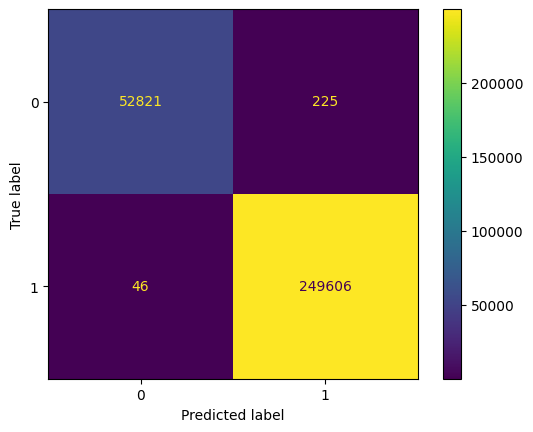

In [68]:
ConfusionMatrixDisplay.from_estimator(pipe1,X_test , y_test)

In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53046
           1       1.00      1.00      1.00    249652

    accuracy                           1.00    302698
   macro avg       1.00      1.00      1.00    302698
weighted avg       1.00      1.00      1.00    302698



In [70]:
pipe2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

In [83]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]

In [85]:
params = {
    'randomforestclassifier__n_estimators' : n_estimators ,
    'randomforestclassifier__max_features' : max_features ,
    'randomforestclassifier__max_depth' : max_depth ,
    'randomforestclassifier__min_samples_split' : min_samples_split
}

In [86]:
rf_random = RandomizedSearchCV(
    pipe2,
    params,
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [87]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              13,
                                                                              21,
                                                                              30],
                                        'randomforestclassifier__max_features': ['auto',
                                                                                 'sqrt'],
                                        'randomforestclassifier__min_samples_split': [5,
                                                                                      10,
                                                                                      15,
                                                                                      100],
                                        'randomforestclassifier__n_estimators': [100,
                                                                                 320,
                                                                                 540,
                                                                                 760,
                                                                                 980,
                                                                                 1200]},
                   verbose=1)

In [88]:
rf_random.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=21, min_samples_split=10,
                                        n_estimators=1200, random_state=42))])

In [89]:
rf_random.best_score_

0.9998777655288666

In [90]:
rf_final = rf_random.best_estimator_

In [91]:
file = r"D:\Anomaly Detection Project\PDF\rf_model_binary_NoOver.pkl"

In [92]:
with open(file,"wb") as f:
    pickle.dump(rf_final, f)

In [93]:
clf = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [95]:
params = {
    "gradientboostingclassifier__n_estimators":range(20,31,5),
    "gradientboostingclassifier__max_depth":range(2,5)
}
params

{'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [97]:
xg_model = RandomizedSearchCV(
    clf,
    params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [98]:
xg_model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('gradientboostingclassifier',
                                              GradientBoostingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'gradientboostingclassifier__max_depth': range(2, 5),
                                        'gradientboostingclassifier__n_estimators': range(20, 31, 5)},
                   verbose=1)

In [99]:
xg_model.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=4, n_estimators=30))])

In [100]:
xg_model.best_score_

0.9997753528815615

In [102]:
xg_final = xg_model.best_estimator_

In [103]:
file = r"D:\Anomaly Detection Project\PDF\xg_model_binary_NoOver.pkl"

In [104]:
with open(file,"wb") as f:
    pickle.dump(xg_final, f)